In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#statistics
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
filepath_train, filepath_test = 'data/oil_gas_train', 'data/oil_gas_train_test'

file_list = ['AMPY.xlsx', 'APA.xlsx', 'AR.xlsx', 'BATL.xlsx', 'BCEI.xlsx',
             'BRY.xlsx', 'BSM.xlsx', 'CDEV.xlsx', 'CHK.xlsx', 'CLR.xlsx', 
             'CNX.xlsx', 'COG.xlsx', 'COP.xlsx', 'CPE.xlsx', 'CRC.xlsx', 
             'CRK.xlsx', 'DEN.xlsx', 'DVN.xlsx', 'EGY.xlsx', 'EOG.xlsx', 
             'EQT.xlsx', 'ESTE.xlsx', 'FANG.xlsx', 'GDP.xlsx', 'HES.xlsx', 
             'LONE.xlsx', 'LPI.xlsx', 'MCF.xlsx', 'MGY.xlsx', 'MNRL.xlsx', 
             'MRO.xlsx', 'MTDR.xlsx', 'MUR.xlsx', 'NOG.xlsx', 'OAS.xlsx', 
             'OVV.xlsx', 'PDCE.xlsx', 'PVAC.xlsx', 'PXD.xlsx', 'REI.xlsx', 
             'RRC.xlsx', 'SBOW.xlsx', 'SD.xlsx', 'SM.xlsx', 'SWN.xlsx', 
             'TALO.xlsx', 'TPL.xlsx', 'VNOM.xlsx', 'WLL.xlsx', 'WTI.xlsx', 
             'XEC.xlsx', 'XOG.xlsx']

companies = ['AMPY', 'APA', 'AR', 'BATL', 'BCEI', 'BRY', 'BSM', 'CDEV', 
             'CHK', 'CLR', 'CNX', 'COG', 'COP', 'CPE', 'CRC', 'CRK', 'DEN',
             'DVN', 'EGY', 'EOG', 'EQT', 'ESTE', 'FANG', 'GDP', 'HES', 
             'LONE', 'LPI', 'MCF', 'MGY', 'MNRL', 'MRO', 'MTDR', 'MUR', 
             'NOG', 'OAS', 'OVV', 'PDCE', 'PVAC', 'PXD', 'REI', 'RRC', 
             'SBOW', 'SD', 'SM', 'SWN', 'TALO', 'TPL', 'VNOM', 'WLL', 
             'WTI', 'XEC', 'XOG']

features = ['Revenue', 'Gross Profit', 'Operating Income', 'Pretax Income',
            'Net Income Avail to Common', 'EPS', 'Total Assets', 
            'Total Liabilities', 'Total Equity']
datenadfeatures = ['date', *features]

# 1.
Для некоторых столбцов все значения - nan

In [3]:
df = pd.read_excel(filepath_train+'/AMPY.xlsx', 
                   skiprows=range(1, 28), 
                   usecols=range(8, 51),index_col=0).T
df.index = range(len(df))
df = df.rename(columns={'INCOME STATEMENT': 'date'})
df.isna().sum().sum()/df.sum().sum()

0.005873612326978439

In [4]:
data = dict()
val = dict()

for company in companies:
    df = pd.read_excel(filepath_train+'/'+str(company)+'.xlsx', 
                                  skiprows=range(1, 28), 
                                  usecols=range(8, 51),index_col=0).T
    df.index = range(len(df))
    df = df.rename(columns={'INCOME STATEMENT': 'date'})
    #df = df[features].apply(pd.to_numeric)
    data[company] = df
print('Completed!')

Completed!


# 2.
Из корреляционных матриц видно, что Revenue сильно коррелирует с Total Assets, Total Liabilities. Operating Income связан с Pretax Income. Эти величины можно использовать, как пердикторы.

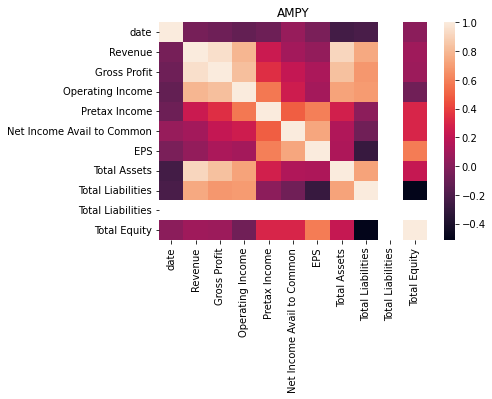

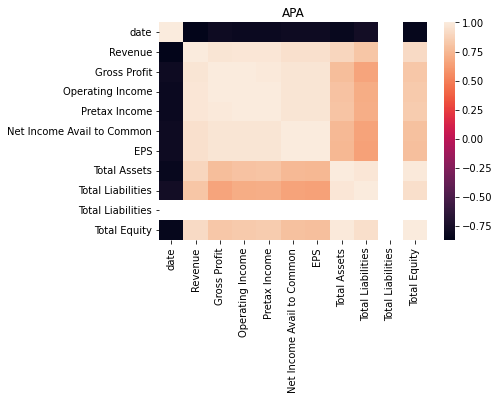

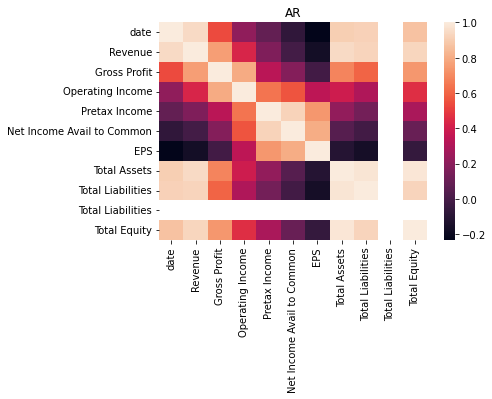

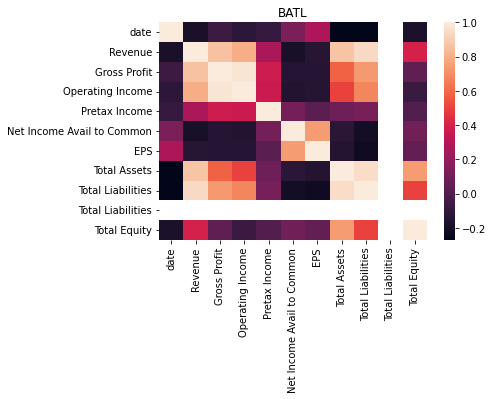

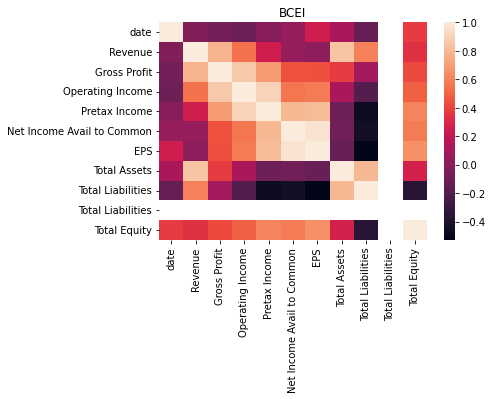

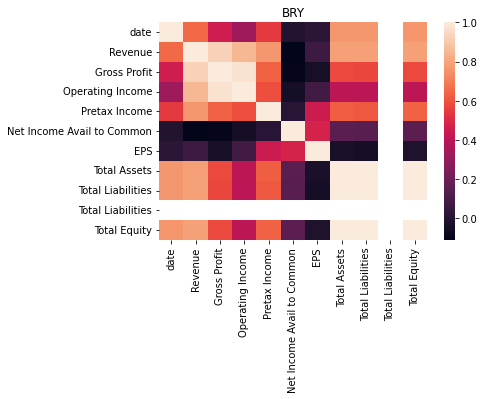

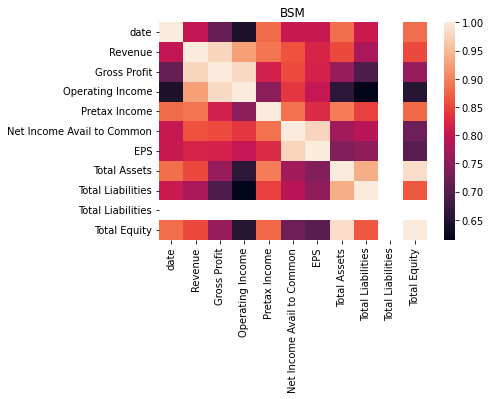

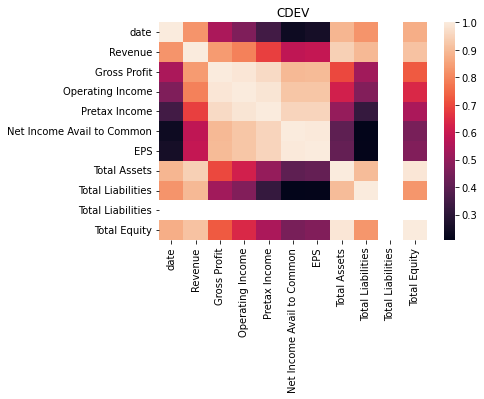

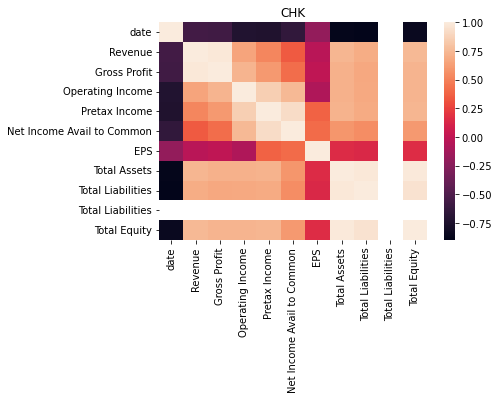

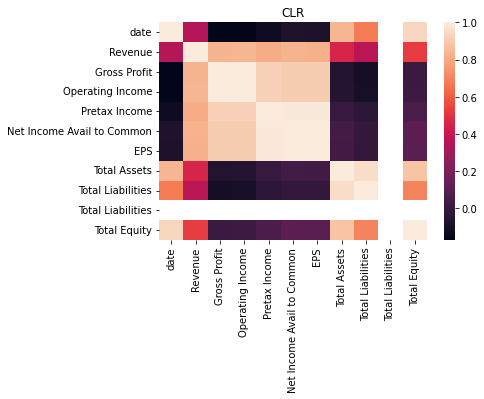

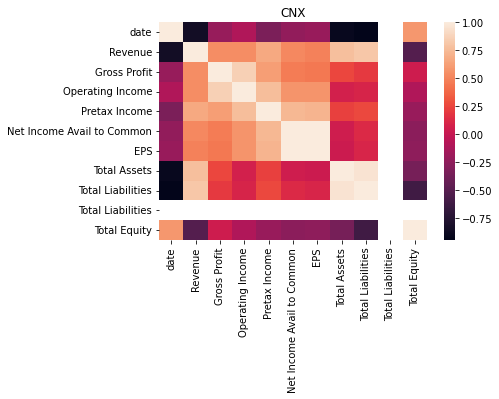

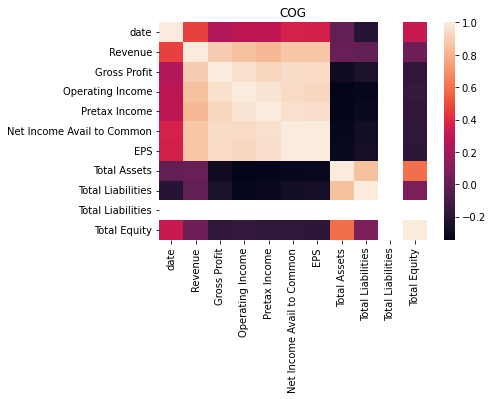

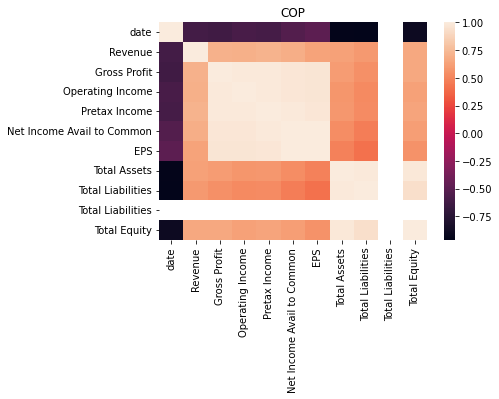

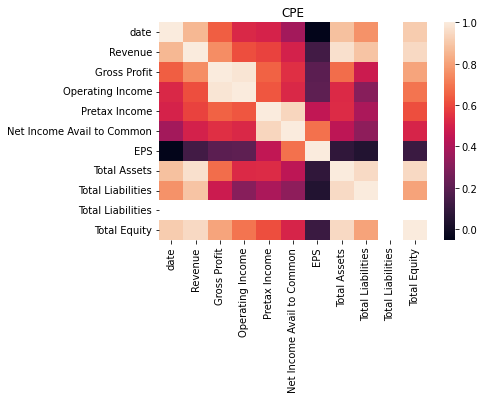

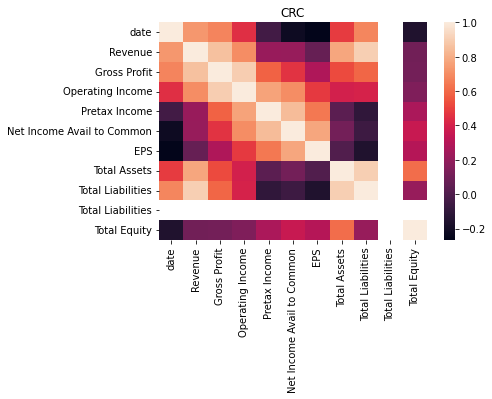

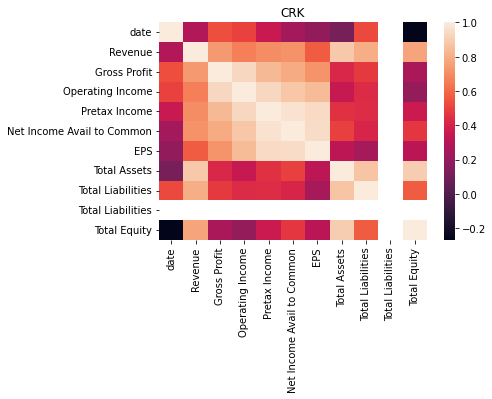

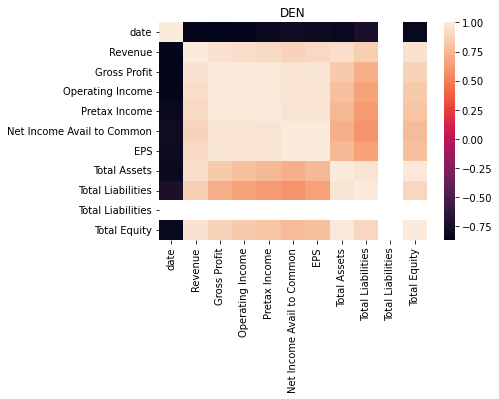

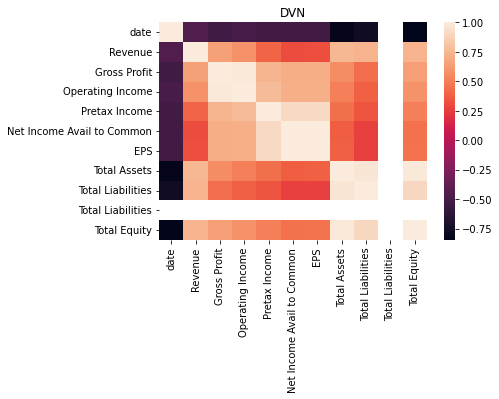

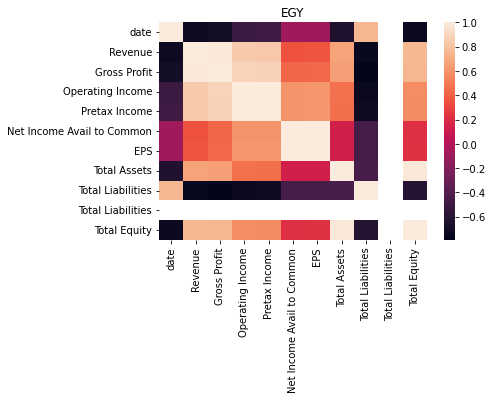

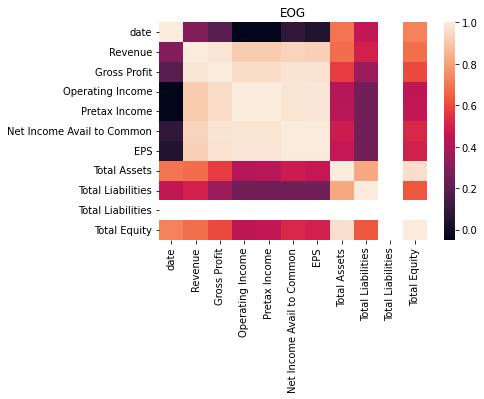

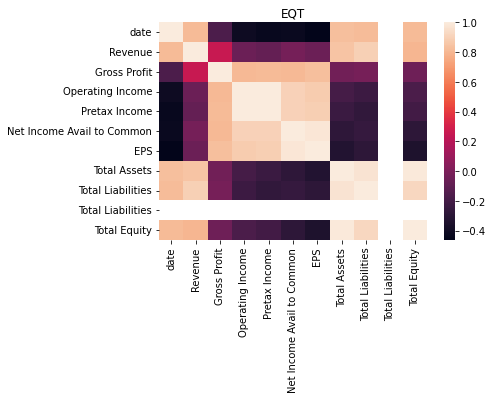

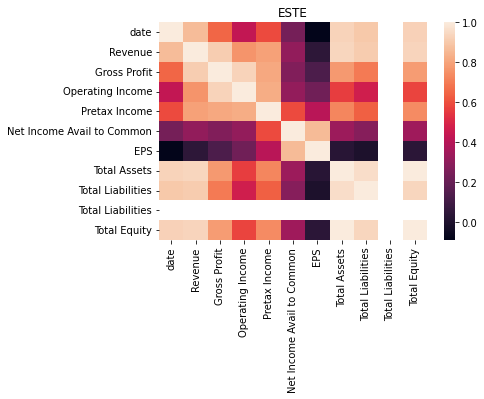

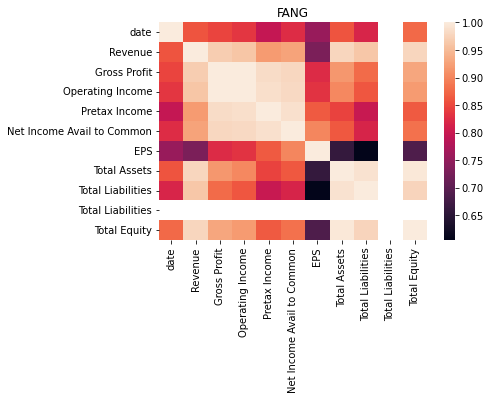

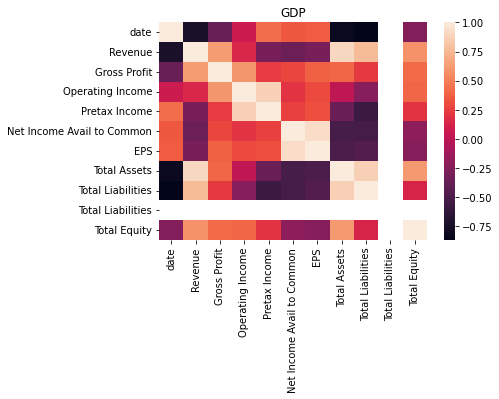

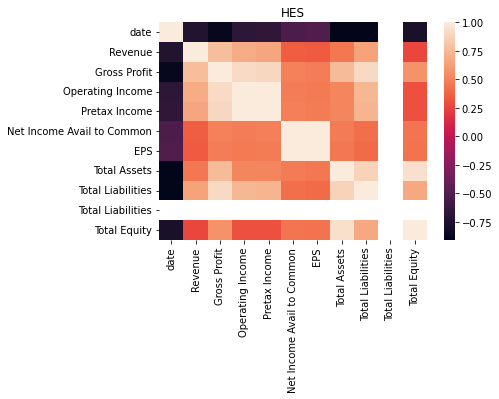

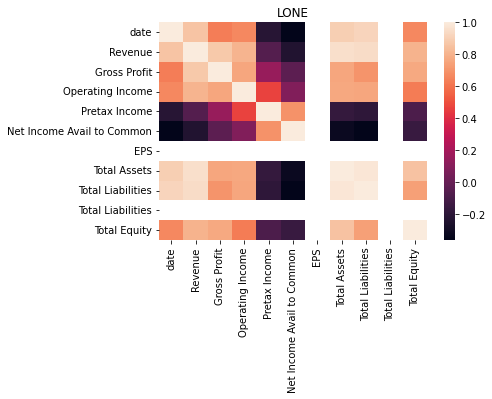

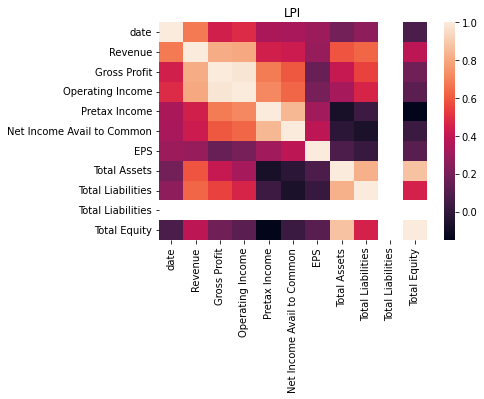

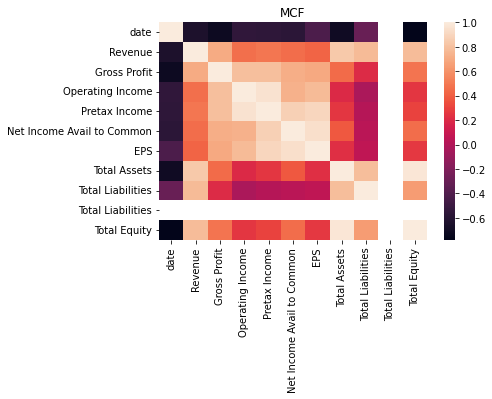

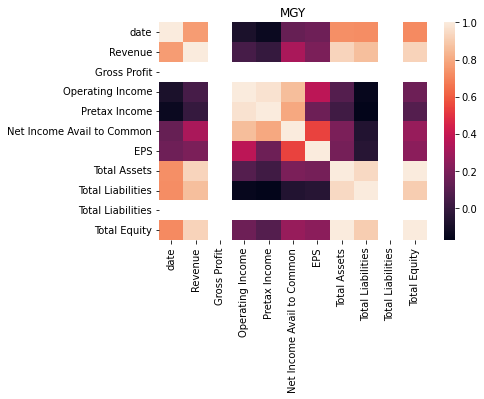

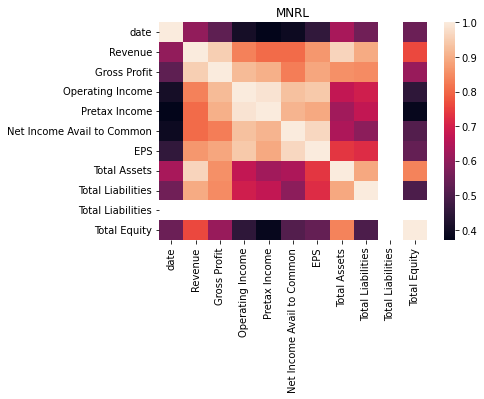

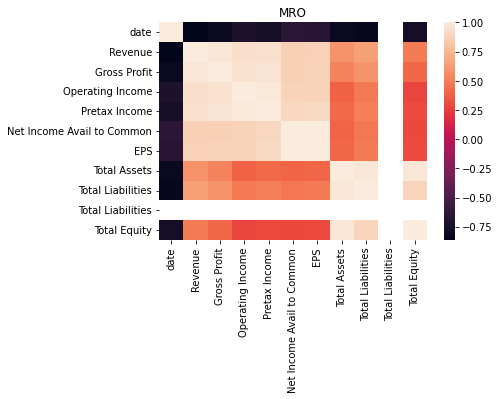

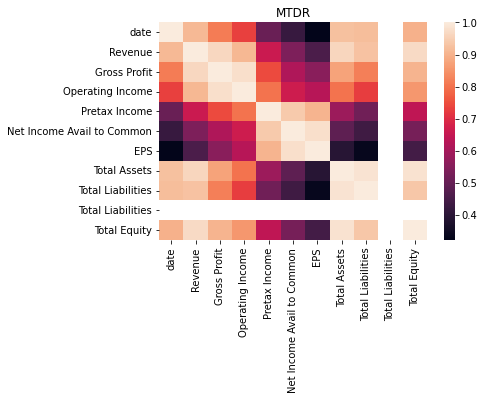

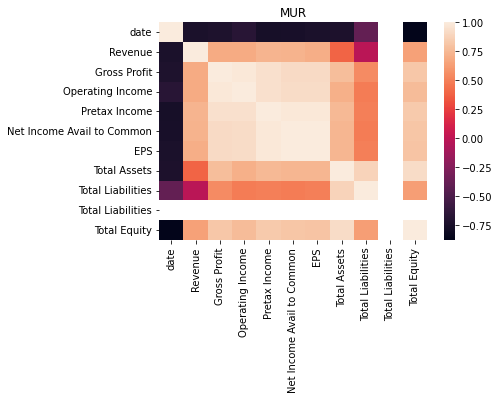

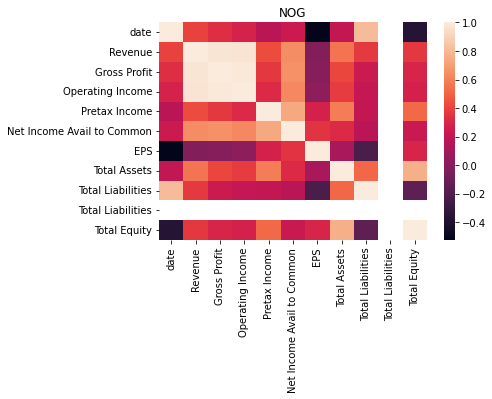

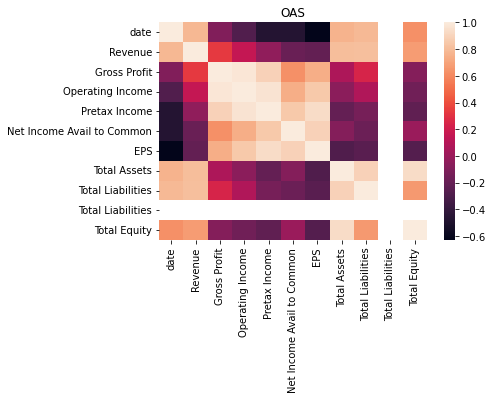

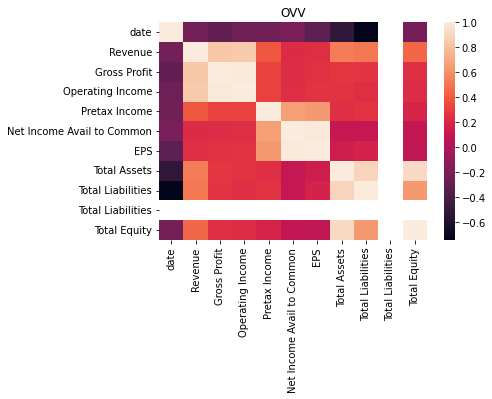

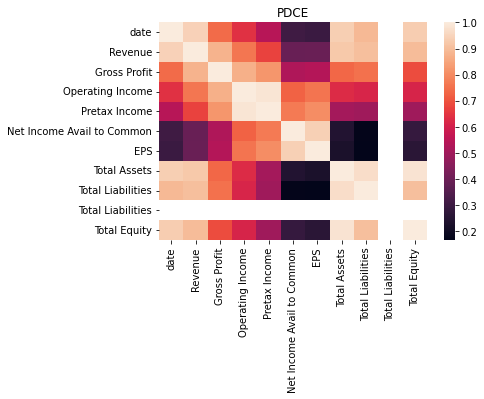

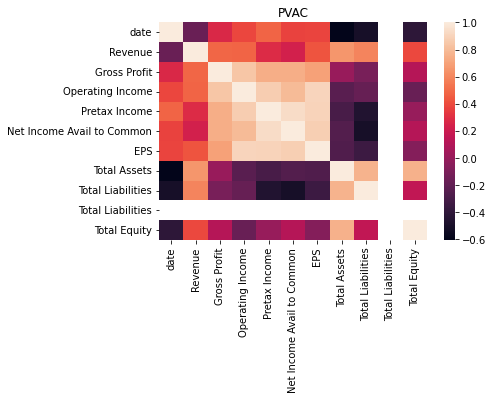

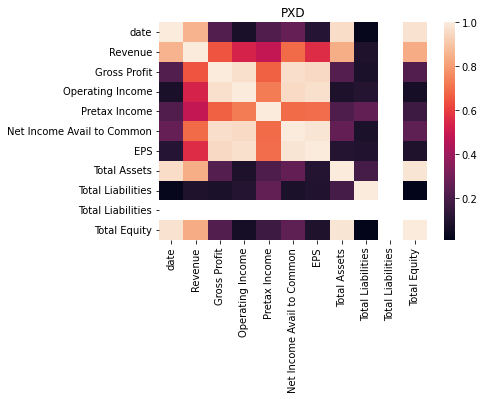

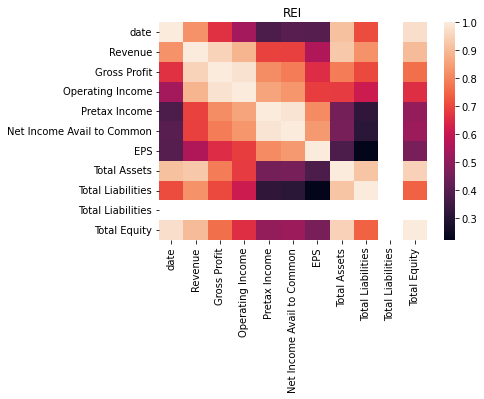

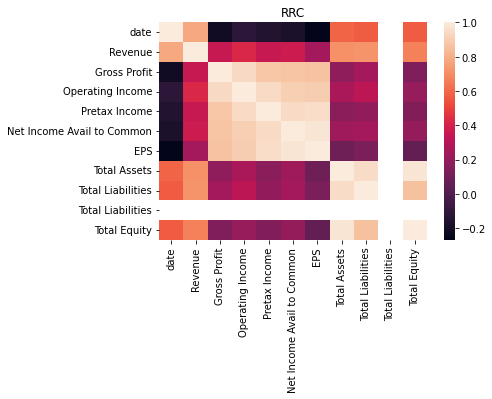

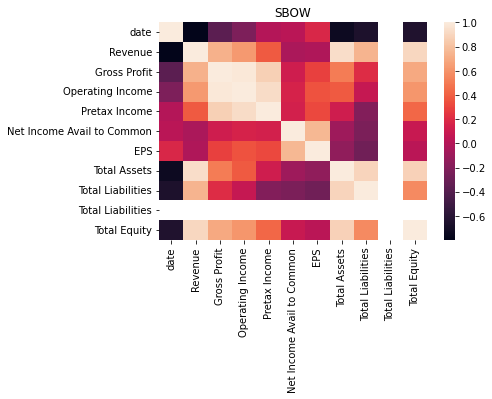

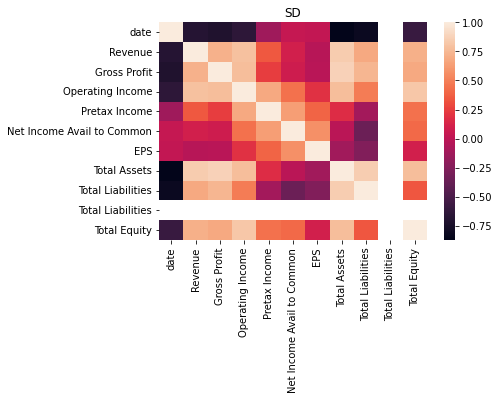

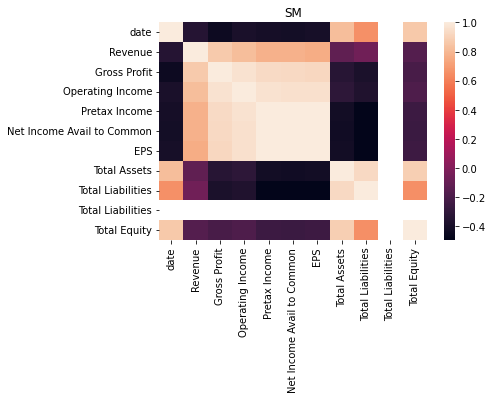

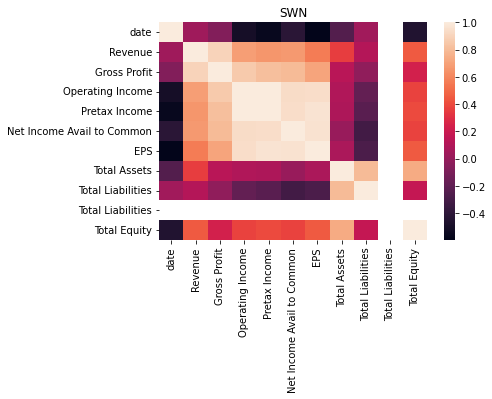

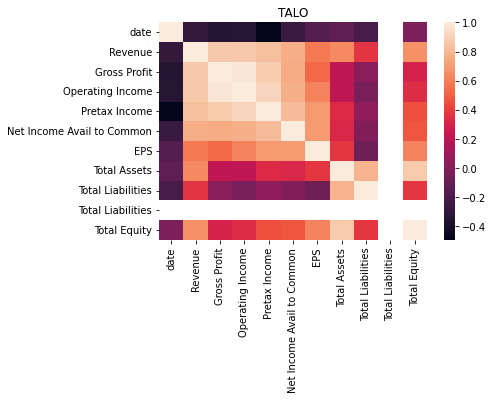

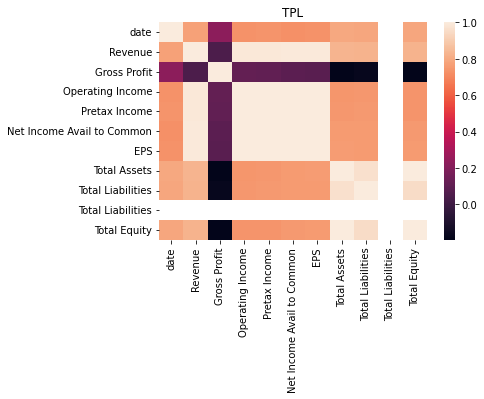

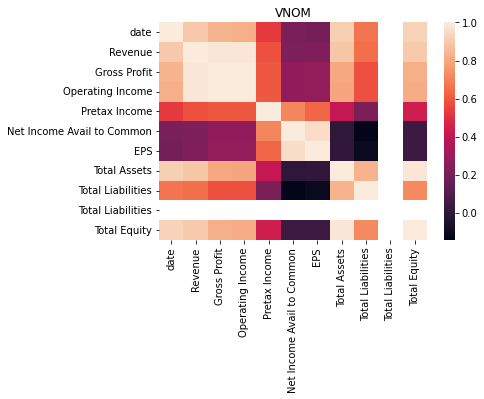

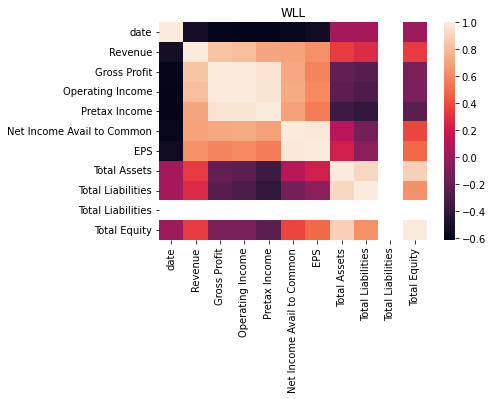

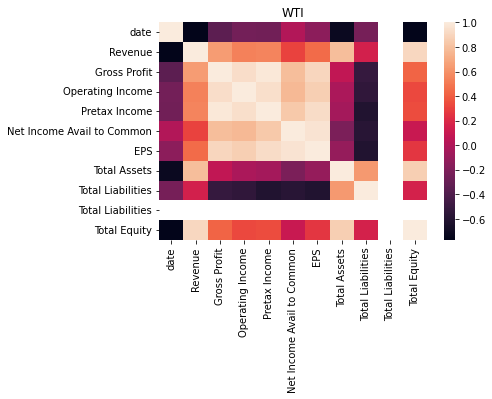

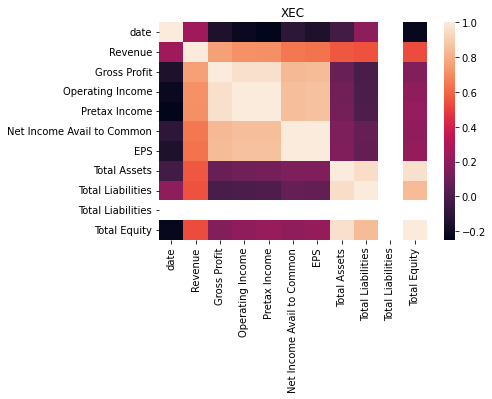

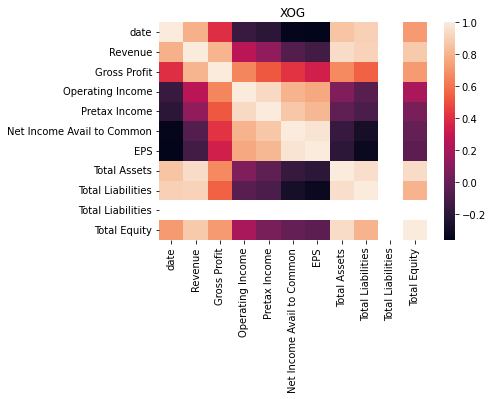

In [5]:
for company in companies:
    df = data[company][datenadfeatures]
    df = df.dropna(axis='columns', how='all').apply(pd.to_numeric)
    sns.heatmap(df.corr())
    plt.title(company)
    plt.show()

# 3.
Будем рассматривать величины Revenue и Operating Income.

Для каждой величины построим график автокорреляции - глядя, на него можно увидеть "плавные" пересечения нуля сорреляций, что должно свидетельствовать о сезонности ряда, однако в силу малого количества данных в выборке пересечения с нулем зачастую попадают в синюю область, а это означает, что данный факт "мало значим" согласно t-критерию

Тест Дики-Фуллера позволяет определить p-уровень значимости гипотезы, о том что ряд ряд нестационарен. Глядя на полученные значения p-value можно сделать вывод, что большинство рядов - нестационарные временные ряды.

Revenue adfuller p-value: 0.395117
Operating Income adfuller p-value: 0.561570


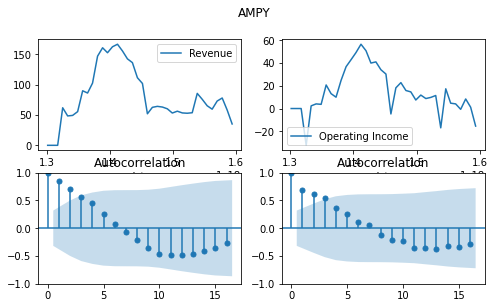

Revenue adfuller p-value: 0.898189
Operating Income adfuller p-value: 0.696327


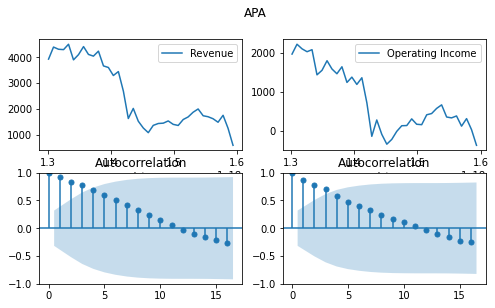

Revenue adfuller p-value: 0.680479
Operating Income adfuller p-value: 0.314357


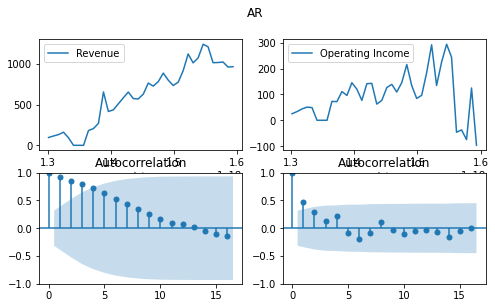

Revenue adfuller p-value: 0.725234
Operating Income adfuller p-value: 0.456279


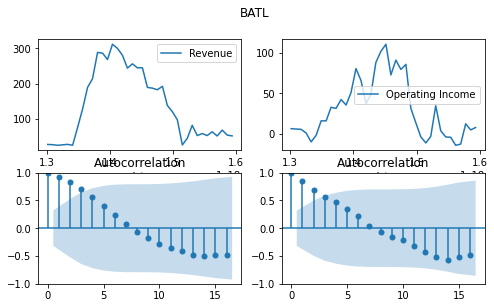

Revenue adfuller p-value: 0.108044
Operating Income adfuller p-value: 0.123478


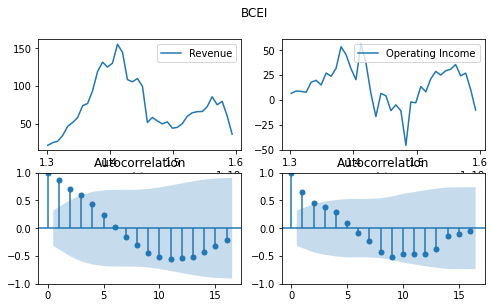

Revenue adfuller p-value: 0.849184
Operating Income adfuller p-value: 1.000000


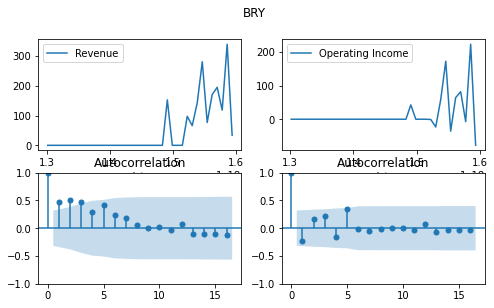

Revenue adfuller p-value: 0.701280
Operating Income adfuller p-value: 0.750163


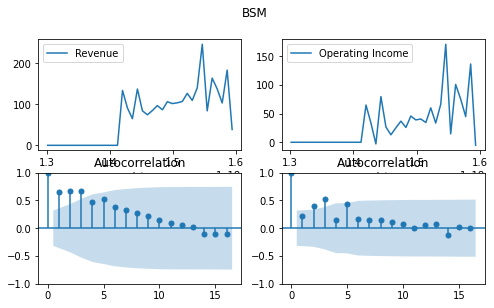

Revenue adfuller p-value: 0.000978
Operating Income adfuller p-value: 0.000141


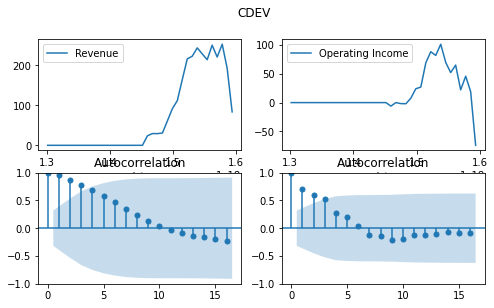

Revenue adfuller p-value: 0.863959
Operating Income adfuller p-value: 0.345165


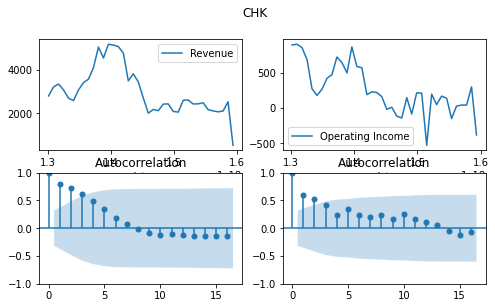

Revenue adfuller p-value: 0.000150
Operating Income adfuller p-value: 0.121841


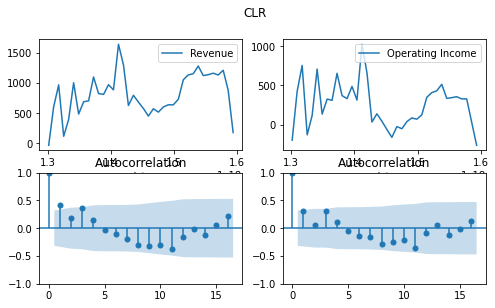

Revenue adfuller p-value: 0.179914
Operating Income adfuller p-value: 0.603362


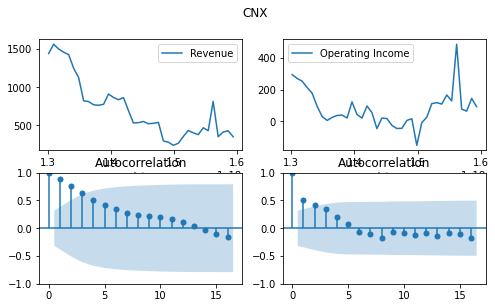

Revenue adfuller p-value: 0.183318
Operating Income adfuller p-value: 0.237535


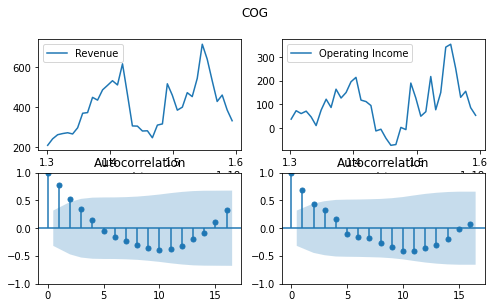

Revenue adfuller p-value: 0.000000
Operating Income adfuller p-value: 0.389066


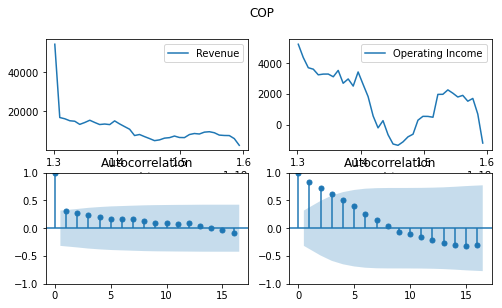

Revenue adfuller p-value: 0.987130
Operating Income adfuller p-value: 0.318989


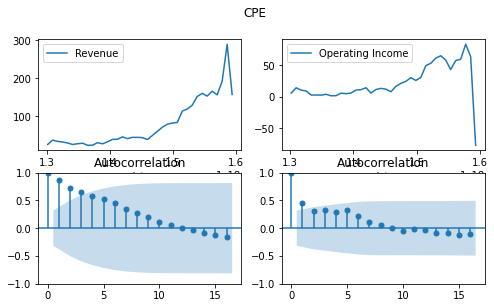

Revenue adfuller p-value: 0.215556
Operating Income adfuller p-value: 0.005108


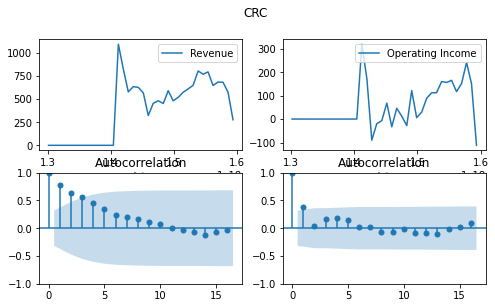

Revenue adfuller p-value: 0.448475
Operating Income adfuller p-value: 0.111442


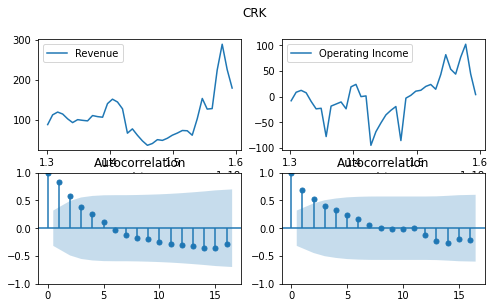

Revenue adfuller p-value: 0.945435
Operating Income adfuller p-value: 0.826679


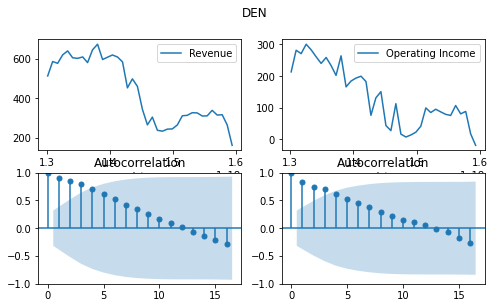

Revenue adfuller p-value: 0.445669
Operating Income adfuller p-value: 0.001926


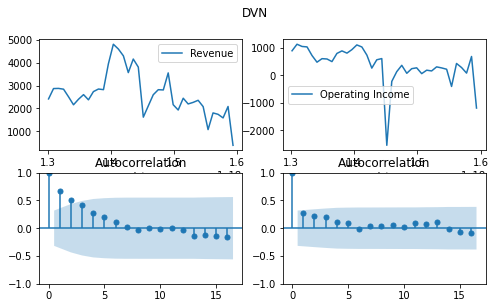

Revenue adfuller p-value: 0.450428
Operating Income adfuller p-value: 0.182163


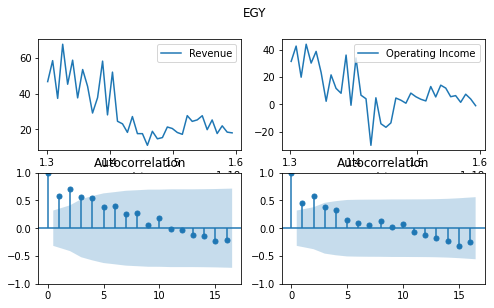

Revenue adfuller p-value: 0.001369
Operating Income adfuller p-value: 0.004049


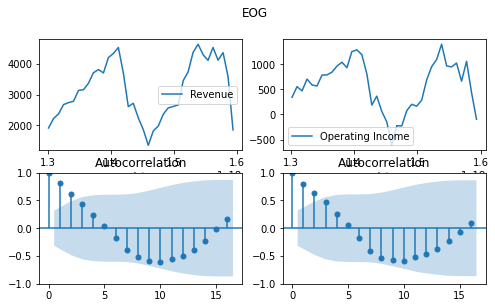

Revenue adfuller p-value: 0.986147
Operating Income adfuller p-value: 0.209566


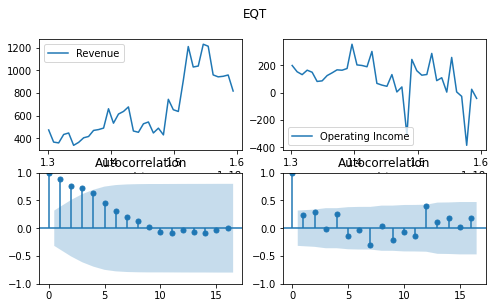

Revenue adfuller p-value: 0.199361
Operating Income adfuller p-value: 0.002223


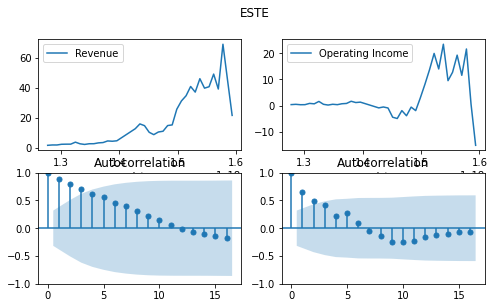

Revenue adfuller p-value: 0.014993
Operating Income adfuller p-value: 0.914457


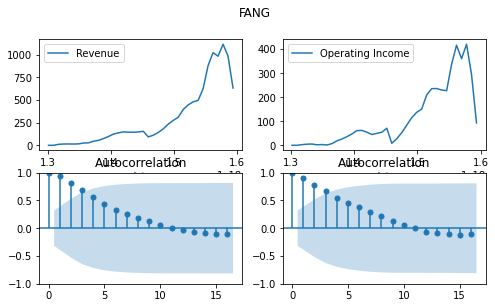

Revenue adfuller p-value: 0.744724
Operating Income adfuller p-value: 0.006271


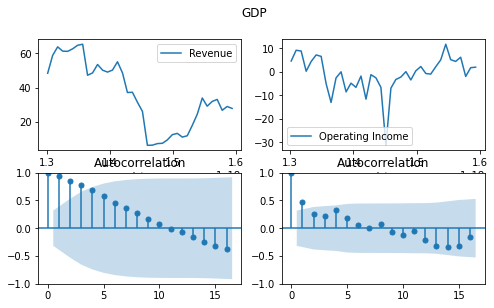

Revenue adfuller p-value: 0.035921
Operating Income adfuller p-value: 0.416966


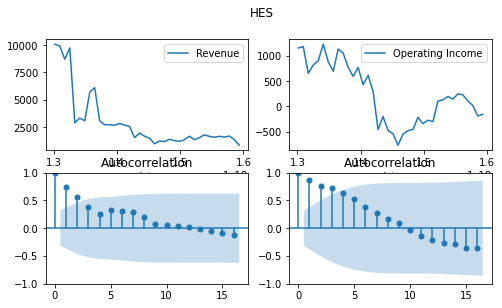

Revenue adfuller p-value: 0.536008
Operating Income adfuller p-value: 0.088652


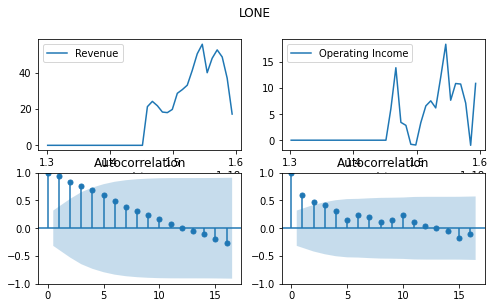

Revenue adfuller p-value: 0.005678
Operating Income adfuller p-value: 0.003026


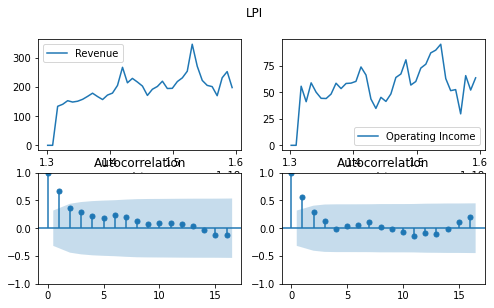

Revenue adfuller p-value: 0.286948
Operating Income adfuller p-value: 0.436227


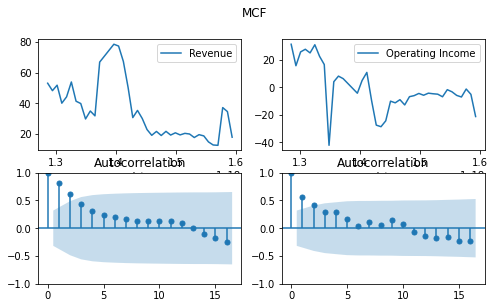

Revenue adfuller p-value: 0.006649
Operating Income adfuller p-value: 1.000000


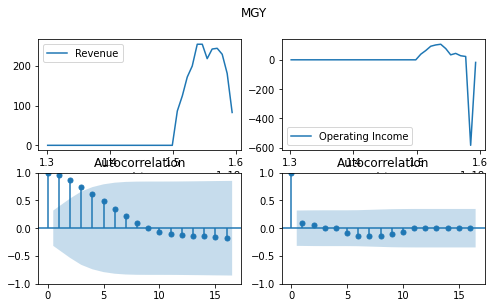

Revenue adfuller p-value: 0.000005
Operating Income adfuller p-value: 0.000000


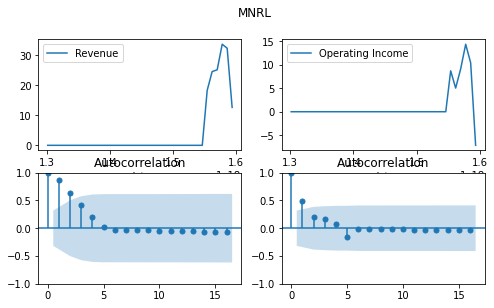

Revenue adfuller p-value: 0.832836
Operating Income adfuller p-value: 0.666275


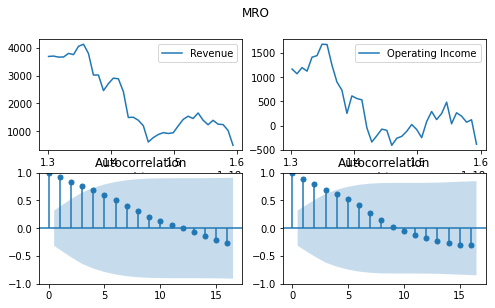

Revenue adfuller p-value: 0.994263
Operating Income adfuller p-value: 0.989099


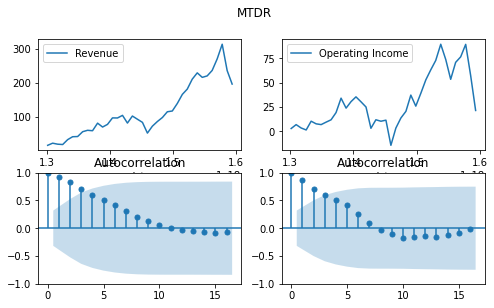

Revenue adfuller p-value: 0.000628
Operating Income adfuller p-value: 0.652012


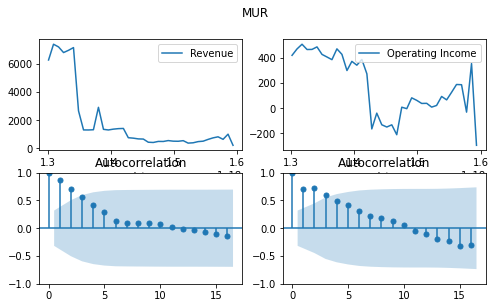

Revenue adfuller p-value: 0.545754
Operating Income adfuller p-value: 0.973660


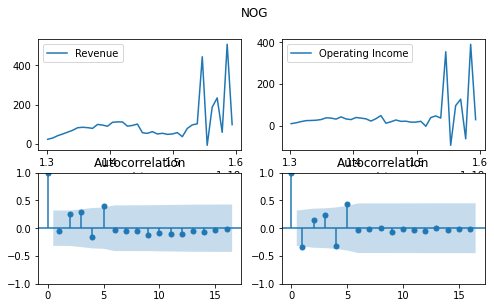

Revenue adfuller p-value: 0.183627
Operating Income adfuller p-value: 0.061855


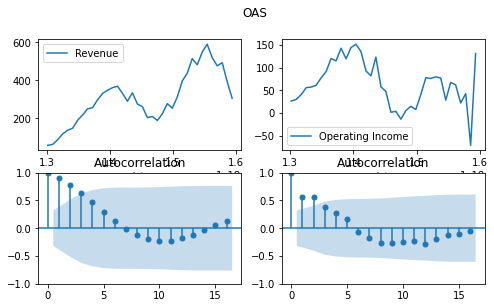

Revenue adfuller p-value: 0.181320
Operating Income adfuller p-value: 0.265486


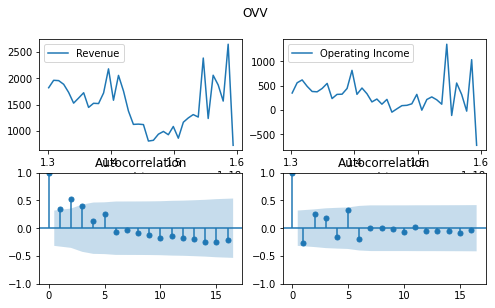

Revenue adfuller p-value: 0.794345
Operating Income adfuller p-value: 0.212485


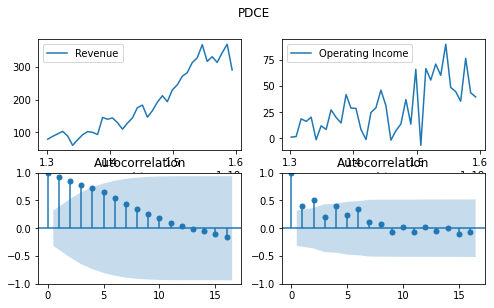

Revenue adfuller p-value: 0.991995
Operating Income adfuller p-value: 0.180246


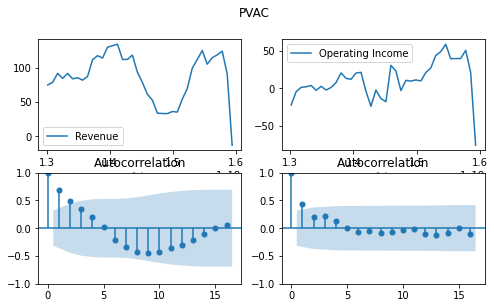

Revenue adfuller p-value: 0.294326
Operating Income adfuller p-value: 0.437160


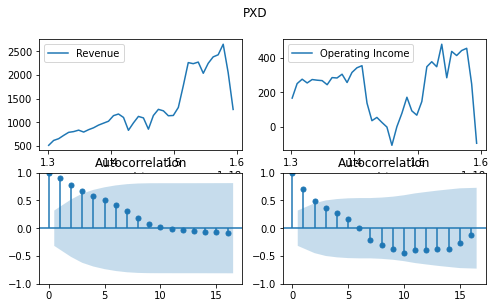

Revenue adfuller p-value: 0.189375
Operating Income adfuller p-value: 0.879864


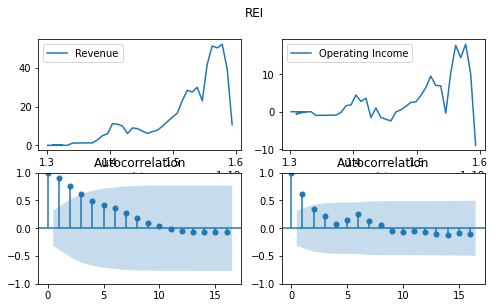

Revenue adfuller p-value: 0.131039
Operating Income adfuller p-value: 0.091774


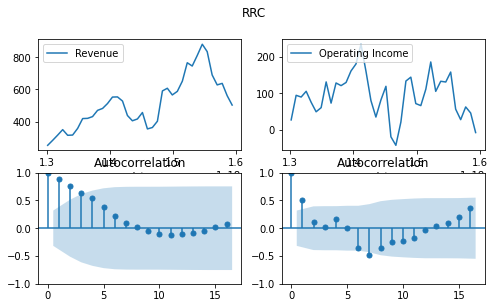

Revenue adfuller p-value: 0.831838
Operating Income adfuller p-value: 0.263146


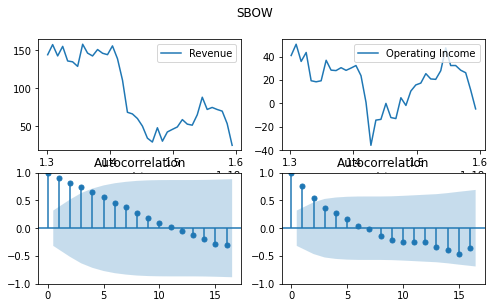

Revenue adfuller p-value: 0.049427
Operating Income adfuller p-value: 0.626319


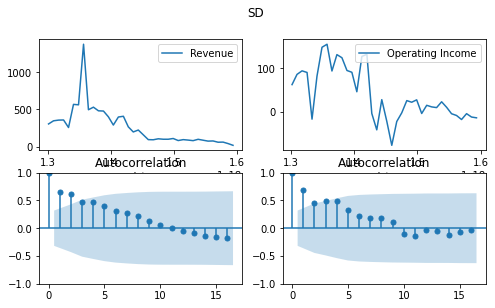

Revenue adfuller p-value: 0.492555
Operating Income adfuller p-value: 0.522482


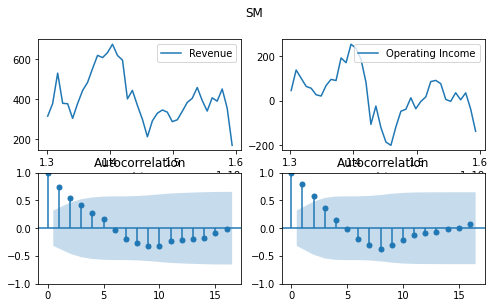

Revenue adfuller p-value: 0.000882
Operating Income adfuller p-value: 0.214498


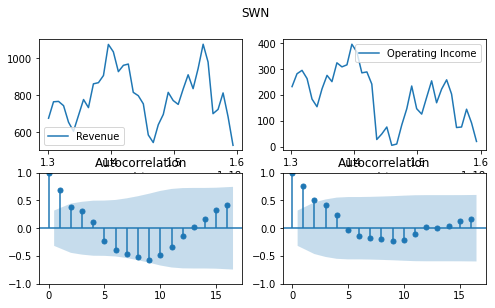

Revenue adfuller p-value: 0.470314
Operating Income adfuller p-value: 0.242233


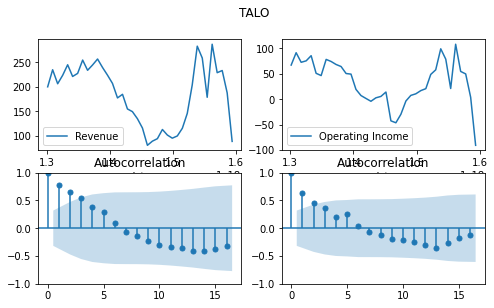

Revenue adfuller p-value: 0.836035
Operating Income adfuller p-value: 0.733941


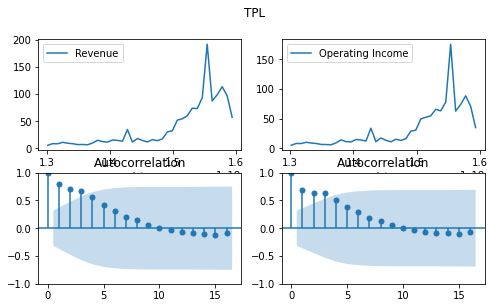

Revenue adfuller p-value: 0.047417
Operating Income adfuller p-value: 0.001794


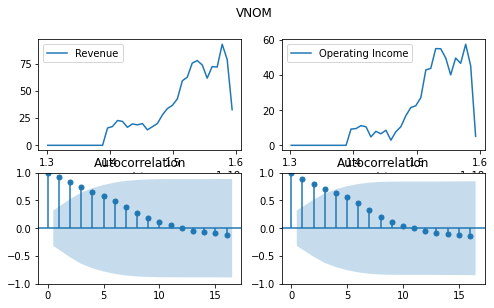

Revenue adfuller p-value: 0.896111
Operating Income adfuller p-value: 0.751403


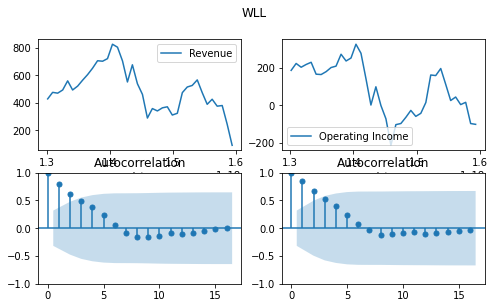

Revenue adfuller p-value: 0.796158
Operating Income adfuller p-value: 0.144753


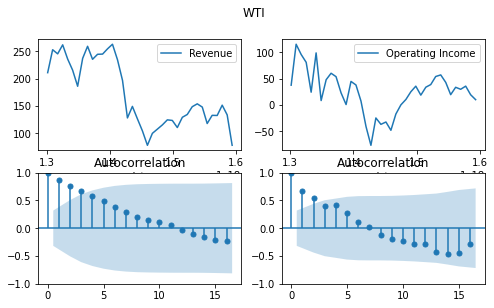

Revenue adfuller p-value: 0.002954
Operating Income adfuller p-value: 0.016576


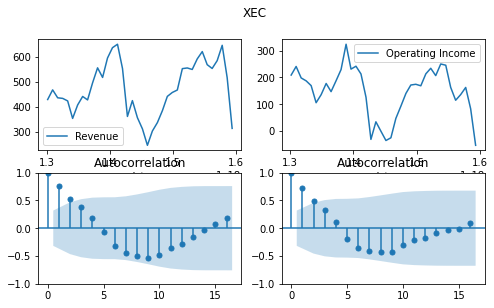

Revenue adfuller p-value: 0.000786
Operating Income adfuller p-value: 0.000919


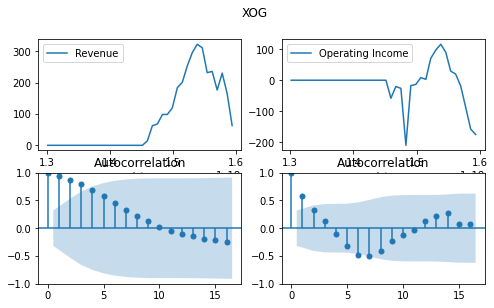

In [6]:
for company in companies:
    df = data[company][datenadfeatures]
    df = df.dropna(axis='columns', how='all').apply(pd.to_numeric)
    fig = plt.figure(figsize=(8, 4.5))
    axul = fig.add_subplot(2, 2, 1)
    axur = fig.add_subplot(2, 2, 2)
    axdl = fig.add_subplot(2, 2, 3)
    axdr = fig.add_subplot(2, 2, 4)
    df.plot('date', 'Revenue', ax=axul)
    df.plot('date', 'Operating Income', ax=axur)
    plot_acf(df.Revenue, ax=axdl)
    plot_acf(df['Operating Income'], ax=axdr)
    fig.suptitle(company)
    result_r = adfuller(df.Revenue.dropna())
    result_oi = adfuller(df['Operating Income'].dropna())
    print('Revenue adfuller p-value: %f' % result_r[1])
    print('Operating Income adfuller p-value: %f' % result_oi[1])
    plt.show()